### Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate some Toy data to apply the LR model

In [2]:
np.random.seed(42)
N = 40

#x = np.sort(np.random.normal(0,5,N))

x = np.sort(np.random.uniform(-8,10,N))

truth_x = np.linspace(-10,10,100)

f = lambda x: 0.5*x**3 -2*x**2 -20*x -5

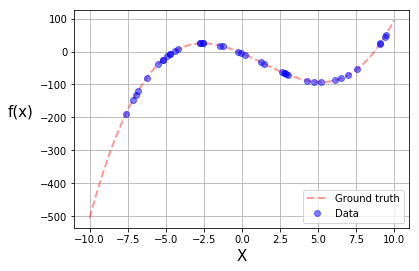

In [3]:
plt.figure(figsize=(6,4))

plt.plot(truth_x,f(truth_x),'--',c='r', label='Ground truth', linewidth=2, alpha=.4)
plt.plot(x,f(x),'o',c='b',alpha=0.5,label='Data')

plt.xlabel('X', fontsize=15)
plt.ylabel('f(x)', rotation=0, fontsize=15, labelpad=20)
plt.grid()
_=plt.legend(loc=4)

### Add some Gaussian noise to the "truth" data  

In [4]:
sigma2 = 25
noise = np.random.normal(0,sigma2,N)
y = f(x) + noise

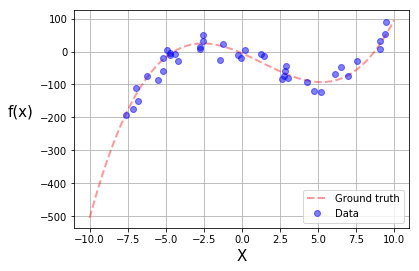

In [5]:
plt.figure(figsize=(6,4))
plt.plot(truth_x,f(truth_x),'--',c='r', label='Ground truth', linewidth=2, alpha=0.4)
plt.plot(x,y,'o',c='b',alpha=0.5,label='Data')
plt.xlabel('X', fontsize=15)
plt.ylabel('f(x)', rotation=0, fontsize=15, labelpad=20)
plt.grid()
_=plt.legend(loc=4)

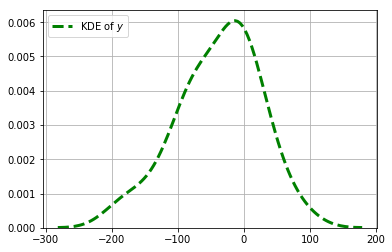

In [6]:
import seaborn as sns
plt.grid()
sns.kdeplot(y,color='g',linestyle='--', linewidth=3, label=r'KDE of $y$')
_=plt.legend(loc=2)

### Analytic solution

In [7]:
# Define the model complexity
M = 9
D = M+1 # one dim for x**0 coefficient

#   (N,1) ** (1,D) -> (N,D)
X = x[:,None] ** np.arange(0,D)[None]
X.shape, y.shape

((40, 10), (40,))

### MLE analytic solution to the Linear Regression problem

In [8]:
import numpy.linalg as la

# set some value for the regularization parameter
lambd = 0.1

#          (D,D)      (D,D)          (D,N)   (N,) -> (D,)  
W = la.inv(X.T @ X + lambd*np.eye(D)) @ X.T @ y
W

array([-3.70386556e+00, -8.52466007e+00, -1.65559234e+00, -1.41202131e+00,
       -1.24627151e-01,  9.26907657e-02,  4.47809834e-03, -1.68801884e-03,
       -4.12427258e-05,  1.04928837e-05])

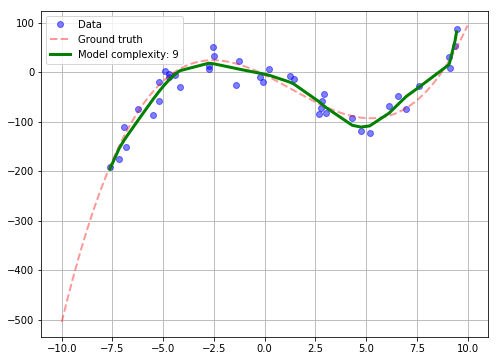

In [9]:
y_hat = X @ W
plt.figure(figsize=(8,6))
plt.plot(x,y,'o',c='b',alpha=0.5,label='Data')
plt.plot(truth_x,f(truth_x),'--',c='r', label='Ground truth', linewidth=2, alpha=0.4)
plt.plot(x, y_hat, c='g',label=f'Model complexity: {M}',linewidth=3)
plt.legend()
plt.grid()

### Solve the LR problem for different model complexities

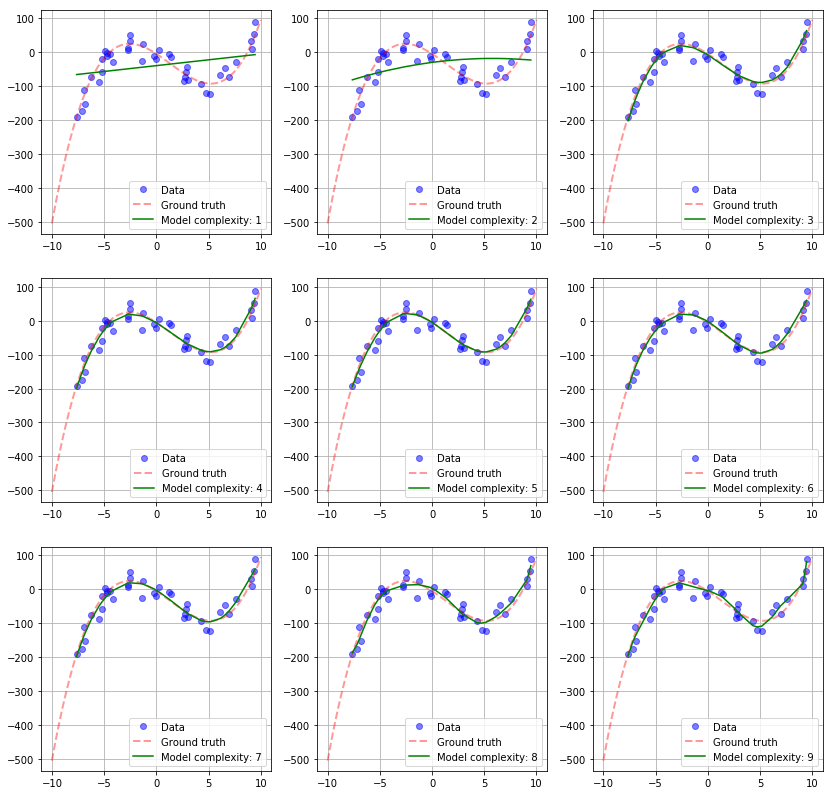

In [10]:
M_complex = np.arange(1,11)
lambd = 0.1
K = 3
fig,axs = plt.subplots(K,K,figsize=(14,14))
it = 0
for i in range(K):
    for j in range(K):
        D = M_complex[it] +1; it += 1
        X = x[:,None] ** np.arange(0,D)[None]
        W = la.inv(X.T @ X + lambd*np.eye(D)) @ X.T @ y # (D,)
        y_hat = X @ W
        ax = axs[i,j]
        ax.plot(x,y,'o',c='b',alpha=0.5,label='Data')
        ax.plot(truth_x,f(truth_x),'--',c='r', label='Ground truth', linewidth=2, alpha=0.4)
        ax.plot(x, y_hat, c='g',label=f'Model complexity: {D-1}')
        ax.grid()
        ax.legend()

## Bayesian Linear Regression graphical model

<br><br>
<img src='B_LR.png' width=400 />
<br>

<br>
<center>
    $\boxed{\large{
        W^* = \mathbb{E}\Big[ W \Big] = \Big( X^{\top}X + \sigma^2 C^{-1} \Big)^{-1} X^{\top} y, \quad \text{where} \quad C = \beta^{-1} \mathbb{1}
    }}$


### Define a precision value for the prior distribution on W and the noise factor

In [13]:
beta_inv = 1 # precision value

M = 3
D = M + 1

C_inv = 1/beta_inv*np.eye(D)

In [14]:
X = x[:,None] ** np.arange(0,D)[None]

# Posterior covariance
XtX = X.T @ X
Sigma_W = la.inv(XtX + sigma2 * C_inv)
# Posterior mean
Xty = X.T @ y
W = Sigma_W @ (Xty)

In [15]:
print(W.shape)
y_hat = X @ W

(4,)


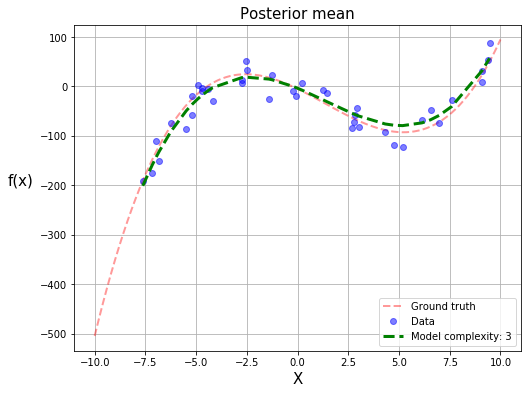

In [16]:
plt.figure(figsize=(8,6))
plt.plot(truth_x,f(truth_x),'--',c='r', label='Ground truth', linewidth=2, alpha=0.4)
plt.plot(x,y,'o',c='b',alpha=0.5,label='Data')
plt.xlabel('X', fontsize=15)
plt.ylabel('f(x)', rotation=0, fontsize=15, labelpad=20)
plt.plot(x,y_hat,'--',c='g', linewidth=3,label=f'Model complexity: {M}')
plt.title("Posterior mean", fontsize=15)
plt.grid()
_=plt.legend(loc=4)

### Predictive destribution

<br>
<center>
    $\boxed{\large{
    \hat{y} = \frac{x^{*^{\top}}\Big( X^{\top}X + x^{*}x^{*^{\top}} + \sigma^2 C^{-1}\Big)X^{\top}y }{1 - x^{*^{\top}}\Big(X^{\top}X+ x^{*}x^{*^{\top}} +\sigma^2 C^{-1}\Big)^{-1}x^{*}}
    }}$

In [17]:
# Define some data point to compute the predictive distribution for
test = truth_x

# Set the Model complexity
M = 5; D = M + 1

T = test[:,None] ** np.arange(0,D)[None]
T.shape

(100, 6)

In [18]:
# precision value
beta_inv = 0.1
C_inv = 1/beta_inv * np.eye(D)
sigma2_C_inv = sigma2*C_inv

In [19]:
# Compute some usefull dot products
X = x[:,None] ** np.arange(0,D)[None]
XtX = X.T @ X
Xty = X.T @ y
XtX.shape, sigma2_C_inv.shape

((6, 6), (6, 6))

#### Compute the predictive mean for the first test point

In [20]:
x_star = T[0]
Sw = la.inv(XtX + np.outer(x_star,x_star) + sigma2_C_inv)

nom = x_star @ Sw @ Xty
den = 1 - x_star @ Sw @ x_star.T
y_hat = nom/den

### Predictive variance
<br><br>
<center>
    $\boxed{\large{
        \hat{\sigma}^{2}_y = \frac{\sigma^2}{ 1 - x^{*^{\top}}\Big(X^{\top}X+ x^{*}x^{*^{\top}} +\sigma^2 C^{-1}\Big)^{-1}x^{*} }
    }}$


#### Compute the predictive variance for the first test point

In [21]:
sigma2_hat = sigma2/den 

### Compute the predictive distribution for all points

In [22]:
y_pred = list()
sigma2_hat = list()
for x_star in T:
    Sw = la.inv(XtX + np.outer(x_star,x_star) + sigma2*C_inv)
    nom = x_star @ Sw @ Xty
    den = 1 - x_star @ Sw @ x_star.T
    y_pred += [nom/den]
    sigma2_hat += [sigma2/den]
y_pred = np.array(y_pred)
y_sigma2_hat = np.array(sigma2_hat) 

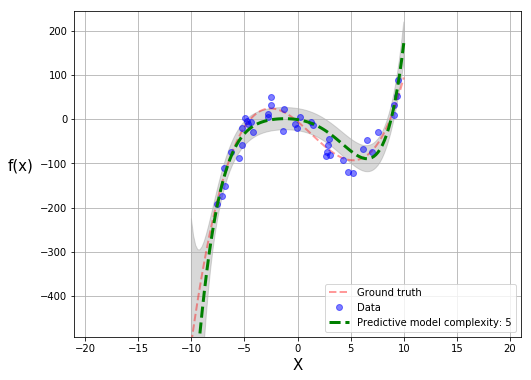

In [25]:
c = 4 # Margin constant for the axis limits

plt.figure(figsize=(8,6))
plt.plot(test,f(test),'--',c='r', label='Ground truth', linewidth=2, alpha=0.4)
plt.plot(x,y,'o',c='b',alpha=0.5,label='Data')

plt.xlabel('X', fontsize=15)
plt.xlim(-c*np.std(x),c*np.std(x))
plt.ylim(-2*c*np.std(y),c*np.std(y))
plt.ylabel('f(x)', rotation=0, fontsize=15, labelpad=20)

plt.plot(test, y_pred,'--', c='g',linewidth=3, label=f'Predictive model complexity: {D-1}')

plt.fill_between(test,y_pred - y_sigma2_hat,y_pred + y_sigma2_hat, 
                 color='grey', alpha=.3)
plt.grid()
_=plt.legend(loc=4)

### Bayesian Free Energy for the Linear Regression model
<br><br>
<center>
    $\boxed{\large{
    2F^{\text{Bayes}} = n\log{(2\pi\sigma^2)} + \log | CX^{\top}X + \sigma^2\mathbb{1}_M | + \frac{||y||^2 - y^{\top}X\Big(X^{\top}X + \sigma^2C^{-1}\Big)^{-1}X^{\top}y }{\sigma^2} 
    }}$

In [26]:
F = N*np.log(2*np.pi*sigma2)
C = la.inv(C_inv)
F += np.prod(la.slogdet(C @ XtX + sigma2*np.eye(D)))

Sigma_W = la.inv(XtX + sigma2*C_inv)

F += ( la.norm(y)**2 - (y @ X @ Sigma_W @ Xty) )/sigma2
F = -2*F
print("Free Energy:", F)

Free Energy: -3524.615567194029


### Put everything together in a class

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

class LinReg():
    
    def __init__(self, degree, sigma2=10, beta_inv=0.1):
        if degree < 1:
            print(f'Wrong model complexity: degree={degree}'); return
        self.degree = degree
        self.D = degree + 1
        self.sigma2 = sigma2
        self.beta_inv = beta_inv
        self.C_inv = beta_inv*np.eye(self.D)
        self.C = 1./beta_inv*np.eye(self.D)
    
    def fit(self,x,y):
        self.x = x
        self.y = y
        self.N = len(y)
        self.X = x[:,None] ** np.arange(0,self.D)[None]
        self.XtX = self.X.T @ self.X
        self.Xty = self.X.T @ self.y
        self.Sigma_W = la.inv(self.XtX + self.sigma2*self.C_inv)
        # Posterior mean
        self.W = self.Sigma_W @ self.Xty
        self.y_hat = self.X @ self.W
        
    def energy(self):
        F = self.N*np.log(2*np.pi*self.sigma2)
        F += np.prod(la.slogdet(self.C @ self.XtX + self.sigma2*self.C_inv))
        F += ( la.norm(self.y)**2 - (self.y @ self.X @ self.Sigma_W @ self.Xty) )/self.sigma2
        self.F = -2*F
        return F
        
    def predict(self,x):
        self.m = x
        self.T = x[:,None] ** np.arange(0,self.D)[None]
        y_pred = list()
        sigma2_hat = list()
        for x_star in self.T:
            Sw = la.inv(self.XtX + np.outer(x_star,x_star) + self.sigma2*self.C_inv)
            nom = x_star @ Sw @ self.Xty
            den = 1 - x_star @ Sw @ x_star.T
            y_pred += [nom/den]
            sigma2_hat += [self.sigma2/den]
        self.y_pred = np.array(y_pred)
        self.y_sigma2_hat = np.array(sigma2_hat) 
        
    def fit_predict(x,y):
        self.fit(x,y); self.predict(x)
        
    def plot_posterior(self, size=(8,6), f=None, xmin=-12, xmax=12, c=4):
        if self.y_hat is None:
            print("No data is fitted !"); return
        truth_x = np.linspace(xmin,xmax,100)
        plt.figure(figsize=(8,6))
        plt.plot(truth_x,f(truth_x),'--',c='r', label='Ground truth', linewidth=2, alpha=0.4)
        plt.plot(self.x,self.y,'o',c='b',alpha=0.5,label='Data')
        plt.xlabel('X', fontsize=15)
        plt.ylabel('f(x)', rotation=0, fontsize=15, labelpad=20)
        plt.plot(self.x,self.y_hat,'--',c='g', linewidth=3,label=f'Model complexity: {M}')
        plt.title("Posterior mean", fontsize=15)
        plt.grid()
        _=plt.legend(loc=4)
        
    def plot_predictive(self, size=(8,6), f=None, c=4):
        if self.y_pred is None:
            print("No data is given to predict !"); return
        
        plt.figure(figsize=(8,6))
        plt.plot(self.m,f(self.m),'--',c='r', label='Ground truth', linewidth=2, alpha=0.4)
        plt.plot(self.x,self.y,'o',c='b',alpha=0.5,label='Data')

        plt.xlabel('X', fontsize=15)
        plt.xlim(-c*np.std(self.x),c*np.std(self.x))
        plt.ylim(-2*c*np.std(self.y),c*np.std(self.y))
        plt.ylabel('f(x)', rotation=0, fontsize=15, labelpad=20)

        plt.plot(self.m, self.y_pred,'--', c='g',linewidth=3, label=f'Predictive model complexity: {self.degree}')

        plt.fill_between(self.m,self.y_pred-self.y_sigma2_hat,self.y_pred+self.y_sigma2_hat, 
                         color='grey', alpha=.3)
        plt.grid()
        _=plt.legend(loc=4)

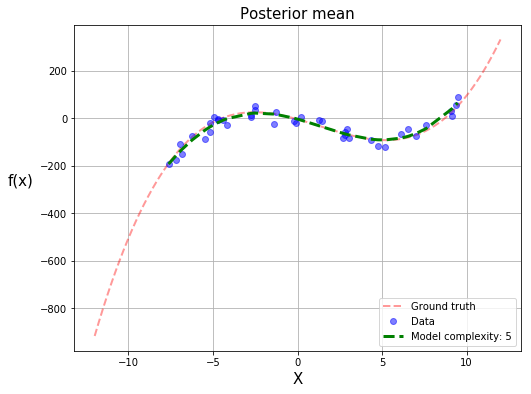

In [28]:
lr = LinReg(degree=5)
lr.fit(x,y)
lr.plot_posterior(f=f)

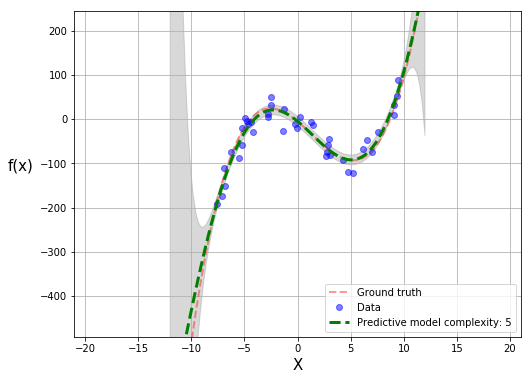

In [29]:
lr.predict(np.linspace(-12,12,100))
lr.plot_predictive(f=f)

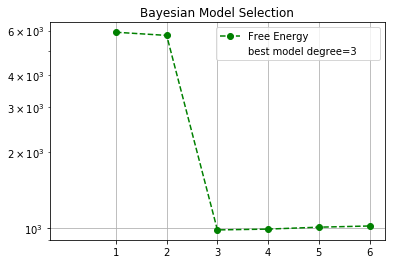

In [32]:
deg = np.arange(1,7)
E = []
for d in deg:
    lr = LinReg(degree=d, sigma2=sigma2)
    lr.fit(x,y)
    E += [lr.energy()]
plt.plot(deg,E,'o--', c='g', label='Free Energy')
plt.title("Bayesian Model Selection")
plt.xticks(deg)
plt.yscale('log')
plt.plot(0,0,label=f'best model degree={np.argmin(E)+1}      ',alpha=0)
plt.grid()
_=plt.legend()